# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'f79631dda8568b55f37cd635a59953c9'

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query1 = url + "appid=" + api_key + "&units=" + units + "&q=" + "albany"
#response = requests.get(query1)
#query2 = response.json()
#pprint(query2)
#print(query2["coord"]["lat"])
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
lats = []
lngs = []
city_list = []
temp = []
clouds = []
wind_speed = []
humidity = []
x = 1
for city in cities: 
    print(f'{x}. {city}')
    
    try: 
        response0 = requests.get(query_url + city)
        response = response0.json()
        #pprint(response)
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        city_list.append(response["name"])
        temp.append(response["main"]["temp"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        x = x + 1
        
    except KeyError:
        print(f'Sorry, I could not find data for {city}.')
        continue
    time.sleep(0.01)
    
print(len(lats))
print(len(lngs))
print(len(city_list))
print(len(temp))
print(len(clouds))
print(len(wind_speed))
print(len(humidity))
print(x)

1. faanui
2. dalvik
3. dikson
4. bethel
5. rikitea
6. kapaa
7. upernavik
8. leningradskiy
9. conceicao do araguaia
10. ilebo
11. hobart
12. barrow
13. broome
14. vardo
15. saint-philippe
16. thai nguyen
17. ushuaia
18. qaanaaq
19. petropavlovsk-kamchatskiy
20. dingle
21. aksay
22. hovd
23. busselton
24. kon tum
25. guerrero negro
26. albany
27. bluff
28. taolanaro
Sorry, I could not find data for taolanaro.
28. hithadhoo
29. nikolskoye
30. illoqqortoormiut
Sorry, I could not find data for illoqqortoormiut.
30. mataura
31. dinguiraye
32. sarakhs
33. yellowknife
34. pevek
35. butaritari
36. cidreira
37. mackenzie
38. amderma
Sorry, I could not find data for amderma.
38. thompson
39. carnarvon
40. nantucket
41. panama city
42. bubaque
43. necochea
44. khatanga
45. mys shmidta
Sorry, I could not find data for mys shmidta.
45. belushya guba
Sorry, I could not find data for belushya guba.
45. fare
46. tuatapere
47. coquimbo
48. constitucion
49. lorengau
50. narsaq
51. namibe
52. georgetown
5

422. mwinilunga
423. trincomalee
424. dhidhdhoo
425. oxford
426. boa vista
427. yaypan
428. san miguel
429. dongsheng
430. maceio
431. makubetsu
432. nurota
433. hirara
434. bonfim
435. nome
436. opuwo
437. balaipungut
438. longlac
Sorry, I could not find data for longlac.
438. sandpoint
439. puyang
440. barber
441. bonham
442. nadym
443. bathsheba
444. pisco
445. prince rupert
446. soto la marina
447. wattegama
448. sayansk
449. manzhouli
450. sinnamary
451. ola
452. kushiro
453. bolitoc
454. da nang
Sorry, I could not find data for da nang.
454. aswan
455. santa cruz
456. avesta
457. hambantota
458. atasu
459. kavieng
460. yar-sale
461. tabou
462. portland
463. porto novo
464. buraydah
465. kavaratti
466. vreed en hoop
Sorry, I could not find data for vreed en hoop.
466. whitehorse
467. jumla
468. kichmengskiy gorodok
469. san juan
470. zhigansk
471. rabat
472. sisimiut
473. fevralsk
Sorry, I could not find data for fevralsk.
473. assis
474. ust-nera
475. sangar
476. san quintin
477.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({"City": city_list,"Latitude": lats,"Longitude": lngs,"Temp(F)": temp, "Wind Speed": wind_speed,
                           "Cloudiness Percent": clouds, "Humidity Percent": humidity})

weather_df.to_csv("Weather DataFrame")
weather_df.head()

,City,Latitude,Longitude,Temp(F),Wind Speed,Cloudiness Percent,Humidity Percent
0,Hithadhoo,-0.60,73.08,84.09,9.42,68,100
1,Mount Gambier,-37.83,140.78,60.80,6.93,90,82
2,Mahebourg,-20.41,57.70,75.38,5.73,40,83
3,Lebu,8.96,38.73,60.80,3.36,75,72
4,Ushuaia,-54.81,-68.31,42.80,21.92,75,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

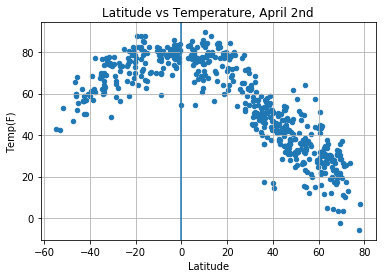

In [26]:
L_T = weather_df.plot(kind="scatter", x="Latitude", y="Temp(F)", title= "Latitude vs Temperature, April 2nd")
plt.axvline(x=0)
plt.grid()
L_T
plt.savefig("temperature.png")

#### Latitude vs. Humidity Plot

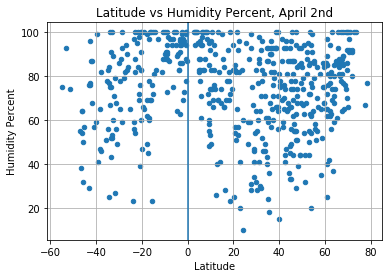

In [27]:
L_H = weather_df.plot(kind="scatter", x="Latitude", y="Humidity Percent", title= "Latitude vs Humidity Percent, April 2nd")
plt.axvline(x=0)
plt.grid()
L_H
plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

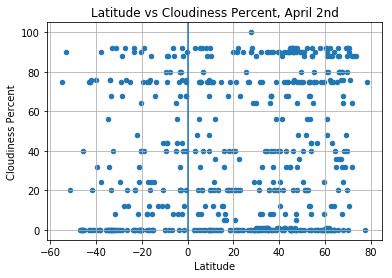

In [28]:
L_C = weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness Percent", title= "Latitude vs Cloudiness Percent, April 2nd")
plt.axvline(x=0)
plt.grid()
L_C
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

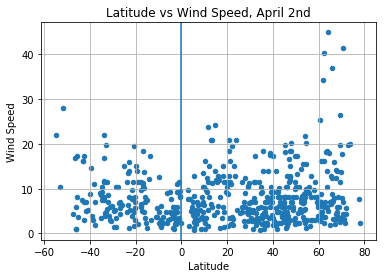

In [29]:
L_WS = weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed", title= "Latitude vs Wind Speed, April 2nd")
plt.axvline(x=0)
plt.grid()
L_WS
plt.savefig("wind_speed.png")

In [ ]:
#Findings
#Observable Trend #1 - The temperature peaks around the equator and falls the further you get from it.
#Observable Trend #2 - Humidity tends to peak around the equator, but not to the same degree as temperature
#Observable Trend #3 - Wind Speed tends to die down around the equator and peak when its furthest away from the equator.
#Observable Trend #4 - Cloudiness seems random relative to distance from the equator